# Загрузка данных

In [ ]:
import warnings

# Settings the warnings to be ignored
warnings.filterwarnings('ignore')

from tqdm.notebook import tqdm
import datetime

# second part
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from scipy import stats

import statsmodels.tsa.api as ts

import statsmodels as sm

import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [ ]:
!wget https://media.githubusercontent.com/media/THECODEDEMOGORGON/TS_DL_workshop/main/data/full_data_sum.csv

--2024-05-13 05:36:22--  https://media.githubusercontent.com/media/THECODEDEMOGORGON/TS_DL_workshop/main/data/full_data_sum.csv
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 344159591 (328M) [text/plain]
Saving to: ‘full_data_sum.csv’

full_data_sum.csv   100%[===================>] 328.22M  87.9MB/s    in 3.6s    

2024-05-13 05:36:31 (90.2 MB/s) - ‘full_data_sum.csv’ saved [344159591/344159591]



[Ссылка на описание данных, на основе которых был получен исследуемый датасет](https://www.nature.com/articles/sdata201555)

In [ ]:
# Считываем данные.
%%time
df = pd.read_csv('full_data_sum.csv')
df['date'] = pd.to_datetime(df['date'])
df['dt'] = pd.to_datetime(df.date) + df.hour.astype('timedelta64[h]')

CPU times: user 6.25 s, sys: 484 ms, total: 6.74 s
Wall time: 6.88 s


In [ ]:
df.head(25)

,square_id,date,hour,sms_in,sms_out,call_in,call_out,internet,dt
0,48,2013-10-31,23,10.466148,5.085509,4.017373,3.098583,921.901244,2013-10-31 23:00:00
1,48,2013-11-01,0,4.657351,3.054674,2.605716,2.348039,804.563753,2013-11-01 00:00:00
2,48,2013-11-01,1,4.883931,3.289720,1.509068,0.316719,806.867571,2013-11-01 01:00:00
3,48,2013-11-01,2,2.522158,0.806494,0.274891,0.585070,812.316221,2013-11-01 02:00:00
4,48,2013-11-01,3,2.053634,0.888435,1.104906,0.497522,639.142303,2013-11-01 03:00:00
5,48,2013-11-01,4,1.776573,0.661460,0.135202,0.752941,645.988491,2013-11-01 04:00:00
6,48,2013-11-01,5,2.573639,2.728286,0.152781,0.186253,800.484844,2013-11-01 05:00:00
7,48,2013-11-01,6,6.322276,2.783220,1.757660,1.168260,886.717974,2013-11-01 06:00:00
8,48,2013-11-01,7,49.973373,14.574827,7.288061,7.811361,884.545357,2013-11-01 07:00:00
9,48,2013-11-01,8,32.758555,13.111741,20.038079,16.482246,1004.306199,2013-11-01 08:00:00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3137833 entries, 0 to 3137832
Data columns (total 9 columns):
 #   Column     Dtype         
---  ------     -----         
 0   square_id  int64         
 1   date       datetime64[ns]
 2   hour       int64         
 3   sms_in     float64       
 4   sms_out    float64       
 5   call_in    float64       
 6   call_out   float64       
 7   internet   float64       
 8   dt         datetime64[ns]
dtypes: datetime64[ns](2), float64(5), int64(2)
memory usage: 215.5 MB


In [ ]:
# Проверим, что в них нет пропусков
series = ['internet', 'sms_in', 'sms_out', 'call_in', 'call_out']
nans = df[series].isna().sum()
nans

internet    0
sms_in      0
sms_out     0
call_in     0
call_out    0
dtype: int64

# Визуализация и анализ разных временных рядов

Функция для визуализации и анализа данных, связанных с определенным столбцом в исходном DataFrame. Она включает в себя:

*  стандартизацию данных (если необходимо)
*  отрисовка гистограммы, для отображающения распределение значений показателя
*  пример изменения показателя на одной БС
*  изменение среднего значения показателя по всем станциям за все время
*  автокорреляционную функцию показателя
*  частную автокорреляционную функцию показателя

In [ ]:
def standardize_group(series):
    return (series - series.mean()) / series.std()

Для более эффективного расположения графиков используют методы `subplots` и `get_gridspec`. Хороший вариант - использовать их комбинацию, поскольку иногда удобнее создать большую часть подграфиков с использованием `subplots`, а затем удалить некоторые и объединить их.

In [ ]:
def vis_col(input_data: pd.DataFrame,
            col: str,
            scaled=False):

    df_ = input_data.copy()

    # Стандартизация значений колонки, если флаг установлен
    if scaled:
        df_[col] = df_.groupby('square_id')[col].transform(standardize_group)

    # Инициализация подграфиков
    fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(30,15))
    ax1 = axs[0, 0]  # График 1
    ax2 = axs[0, 1]  # График 2
    gs = axs[0, 1].get_gridspec()
    axs[1, 0].remove()
    axs[1, 1].remove()
    axs[0, 2].remove()
    axs[0, 3].remove()
    axs[1, 2].remove()
    axs[1, 3].remove()
    ax3 = fig.add_subplot(gs[1, 0:2])  # График 3
    ax4 = fig.add_subplot(gs[0:1, 2:4])  # График 4 (АКФ)
    ax5 = fig.add_subplot(gs[1, 2:4])  # График 5 (Частная АКФ)

    example = df_[df_.square_id==1150].set_index('date')[col]

    # Усредненное значение столбца за каждый час
    _agg = df_.groupby(['date', 'hour'])[col].mean()
    _agg = _agg.reset_index().set_index('date')[col]

    # График 1: Распределение значений столбца
    sns.histplot(df_[col], bins=100, ax=ax1).set(title=f'Распределение значений {col}');

    # График 2: Пример изменения столбца на одной станции
    sns.lineplot(x=example.index,
                 y=example.values,
                 errorbar='ci',
                 err_style='band', ax=ax2).set(title=f'Пример изменения {col} на одной станции');
    ax2.tick_params(axis='x', rotation=45)

    # График 3: Изменение среднего значения столбца за исследуемый период
    sns.lineplot(data=_agg,
                 errorbar='ci',
                 err_style='band', ax=ax3).set(title=f'Изменение среднего значения {col} за исследуемый период');
    ax3.tick_params(axis='x', rotation=45)

    # График 4: Автокорреляционная функция (АКФ) столбца
    nlags = 24 * 7
    corrs, ccnf_intervals = ts.acf(_agg, nlags=nlags, alpha=.05)
    sns.barplot(x=np.arange(0,nlags+1), y=corrs, ax=ax4).set(title=f'АКФ признака {col} за периоды от 1 до {nlags} часов');
    ax4.xaxis.set_ticks(np.arange(0, nlags+1, 10))
    ax4.tick_params(axis='x', rotation=45)

    # График 5: Частная автокорреляционная функция (Частная АКФ) столбца
    nlags = 72
    corrs, ccnf_intervals = ts.pacf(_agg, nlags=nlags, alpha=.05)
    sns.barplot(x=np.arange(0,nlags+1), y=corrs, ax=ax5).set(title=f'Частная АКФ признака {col} за периоды от 1 до {nlags} часов');
    ax5.xaxis.set_ticks(np.arange(0, nlags+1, 10))
    ax5.tick_params(axis='x', rotation=45)

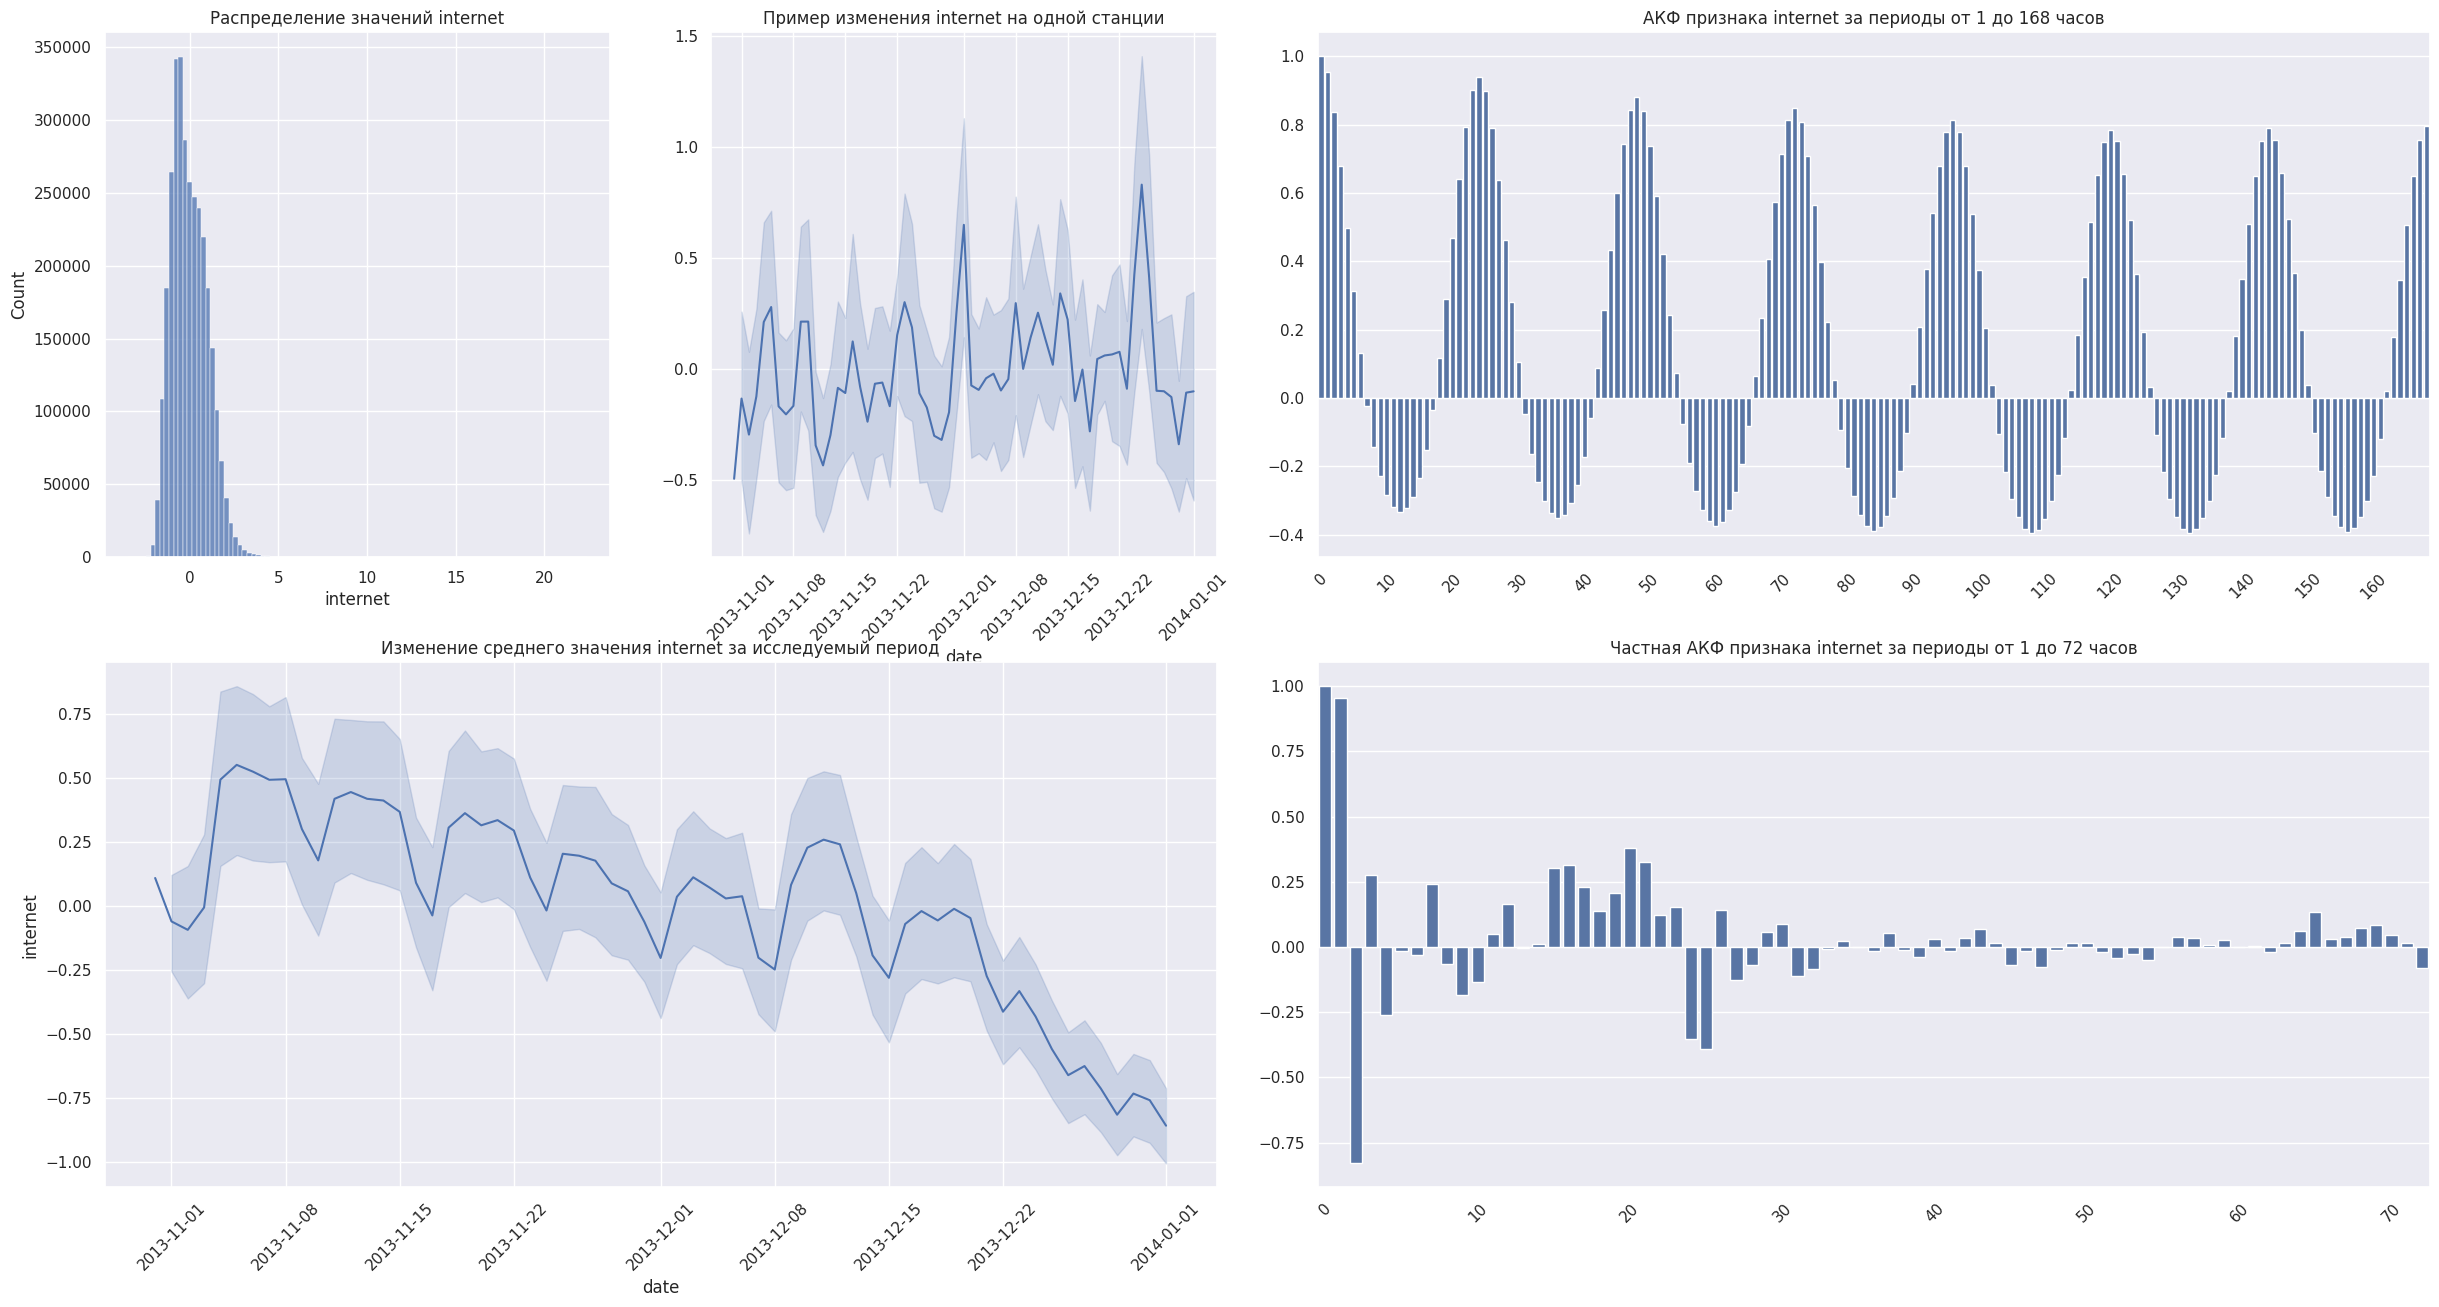

In [ ]:
vis_col(df, 'internet', scaled=True)


Будем анализировать только значения **интернет-нагрузки**.

In [ ]:
print(df.square_id.unique())

[  48  147  247 ... 9985 9986 9987]


In [ ]:
# Проверка стационарности для изначальных данных.
p_vals = []
for s in tqdm(df.square_id.unique()[:200]):
    row = df[df.square_id == s].internet
    p = sm.tsa.stattools.adfuller(row)[1]
    p_vals.append(p)

  0%|          | 0/200 [00:00<?, ?it/s]

In [ ]:
# Проверка стационарности для данных после преобразования Бокса-Кокса
p_vals_box = []
for s in tqdm(df.square_id.unique()[:200]):
    row, lmbda = stats.boxcox(df[df.square_id == s].internet)
    p = sm.tsa.stattools.adfuller(row)[1]
    p_vals_box.append(p)

  0%|          | 0/200 [00:00<?, ?it/s]

In [ ]:
# Проверка стационарности для данных после сезонного дифференцирования
p_vals_stationary = []
for s in tqdm(df.square_id.unique()[:200]):
    row, lmbda = stats.boxcox(df[df.square_id == s].internet)
    row = pd.Series(row) - pd.Series(row).shift(24)
    p = sm.tsa.stattools.adfuller(row[24:])[1]
    p_vals_stationary.append(p)

  0%|          | 0/200 [00:00<?, ?it/s]

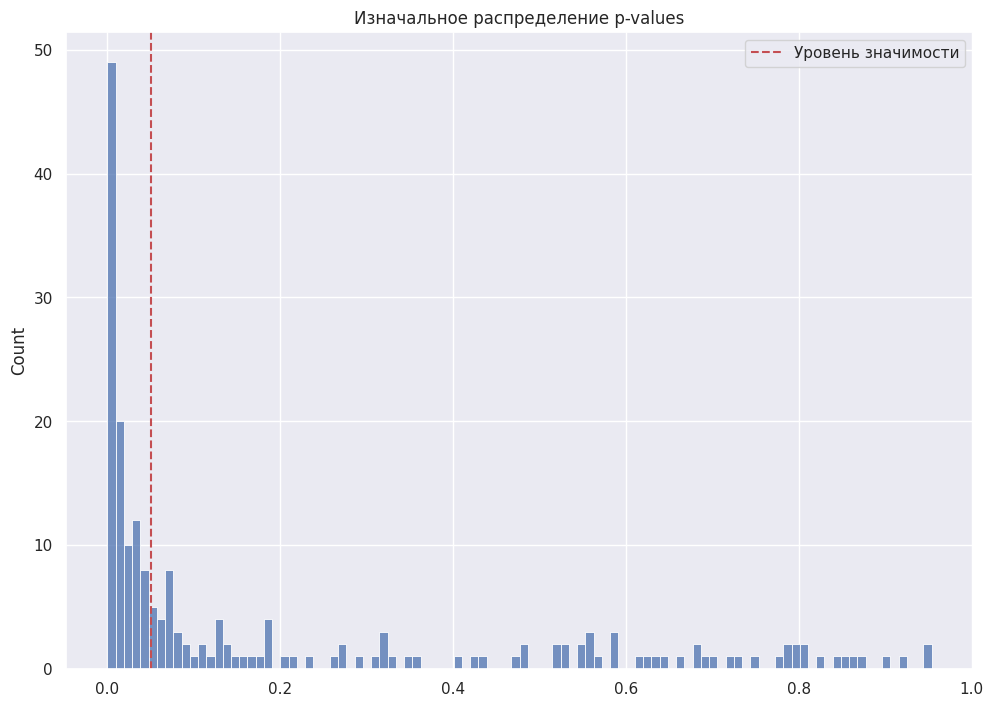

In [ ]:
plt.title('Изначальное распределение p-values')
sns.histplot(p_vals, bins=100)
plt.axvline(x=0.05, color='r', linestyle='--', label='Уровень значимости')
plt.legend();

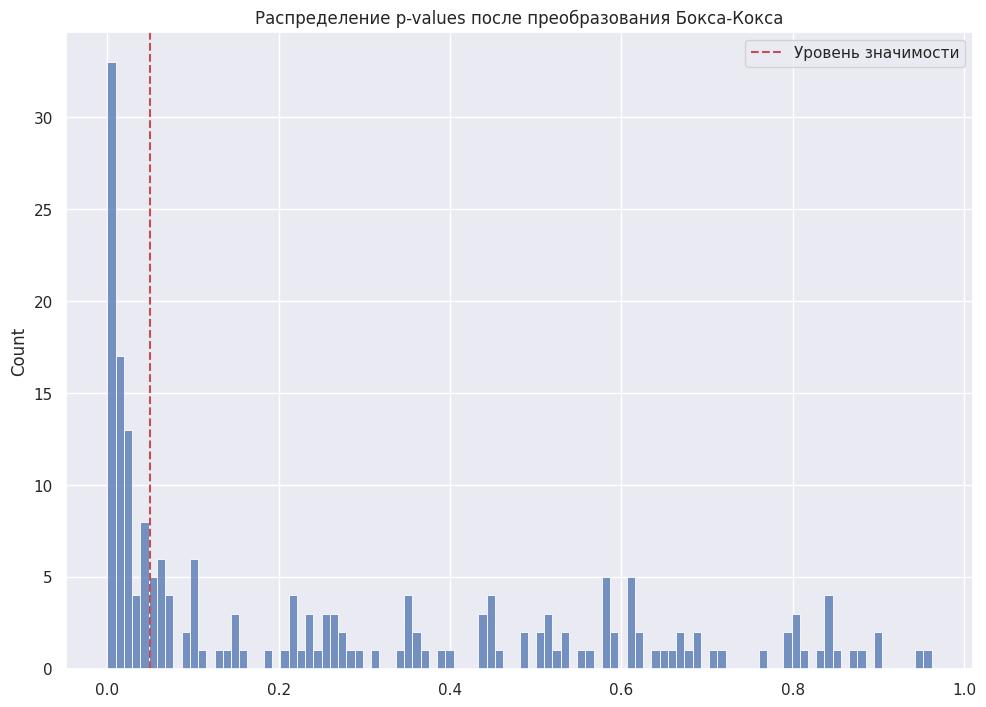

In [ ]:
plt.title('Распределение p-values после преобразования Бокса-Кокса')
sns.histplot(p_vals_box, bins=100)
plt.axvline(x=0.05, color='r', linestyle='--', label='Уровень значимости')
plt.legend();

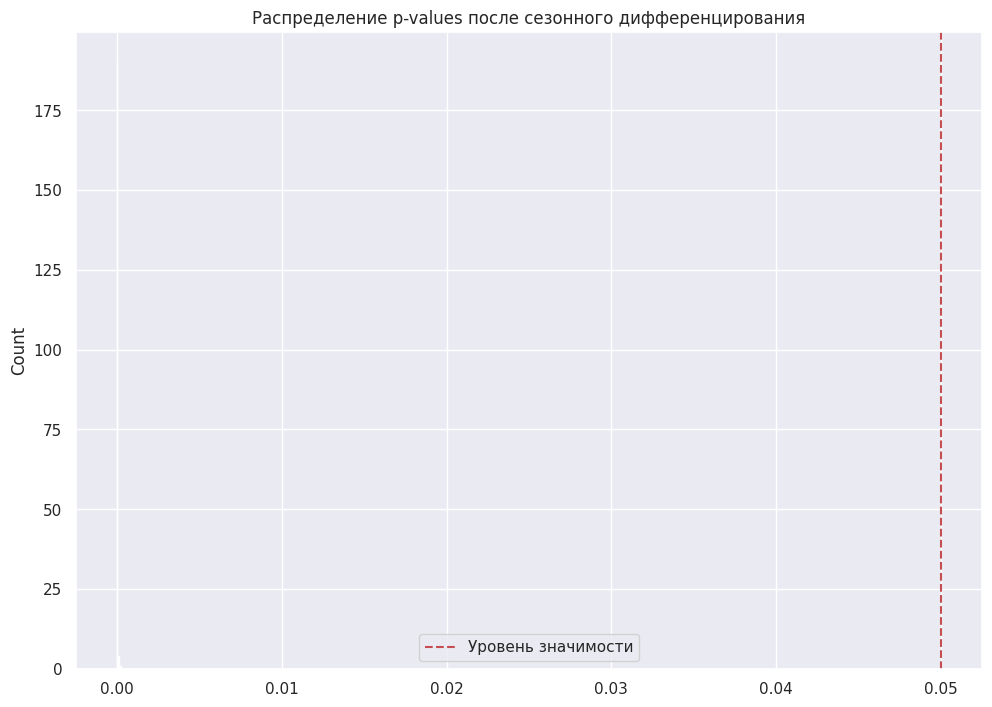

In [ ]:
plt.title('Распределение p-values после сезонного дифференцирования')
sns.histplot(p_vals_stationary, bins=10)
plt.axvline(x=0.05, color='r', linestyle='--', label='Уровень значимости')
plt.legend();

## Подготовка данных

Установим библиотеку `pytorch-forecasting` и импортируем необходимые модули.

In [ ]:
!pip install pytorch-forecasting

# Clearing outputs in Jupyter Notebook
from IPython.display import clear_output
clear_output()

# Checking if the package is installed correctly
try:
    import pytorch_forecasting
    print("pytorch-forecasting is installed successfully.")
except ImportError:
    print("Failed to import pytorch-forecasting.")

pytorch-forecasting is installed successfully.


In [ ]:
import random
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder


import torch
from torchmetrics.functional import r2_score

import lightning.pytorch as pl
from lightning.pytorch.callbacks import EarlyStopping
from lightning.pytorch.tuner import Tuner


from pytorch_forecasting import Baseline, DeepAR, NBeats, TimeSeriesDataSet
from pytorch_forecasting.data import NaNLabelEncoder
from pytorch_forecasting.data.examples import generate_ar_data
from pytorch_forecasting.metrics import RMSE, MAE, SMAPE, MultivariateNormalDistributionLoss
from pytorch_lightning.loggers import TensorBoardLogger

In [ ]:
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
print(DEVICE)

cpu


In [ ]:
def fix_random_seeds(seed=42):
    # Set Python random seed
    random.seed(seed)

    # Set NumPy random seed
    np.random.seed(seed)

    # Set PyTorch random seed for CPU and CUDA devices
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

fix_random_seeds()

In [ ]:
%%time
df = pd.read_csv('./full_data_sum.csv')

CPU times: user 5.68 s, sys: 540 ms, total: 6.22 s
Wall time: 10.6 s


time_idx – целочисленный столбец, обозначающий временной индекс. Этот столбец используется для определения последовательности выборок. Если в наблюдениях нет пропусков, временной индекс должен увеличиваться на +1 для каждой последующей выборки. Первый time_idx для каждой серии не обязательно должен быть равен 0, но допускается любое значение.

In [ ]:
# Предобработаем даты к удобному формату
df['date'] = pd.to_datetime(df['date'])
df['dt'] = pd.to_datetime(df.date) + df.hour.astype('timedelta64[h]')

# Для создания датасета нужно перейти от действительных значений времени к временным шагам
dates_transformer = LabelEncoder()
df['time_idx'] = dates_transformer.fit_transform(df.dt)
df['time_idx'] += 1

# Категориальные переменные должны быть в строковом типе
df['square_id'] = df['square_id'].astype(str)

In [ ]:
df.head(40)

,square_id,date,hour,sms_in,sms_out,call_in,call_out,internet,dt,time_idx
0,48,2013-10-31,23,10.466148,5.085509,4.017373,3.098583,921.901244,2013-10-31 23:00:00,1
1,48,2013-11-01,0,4.657351,3.054674,2.605716,2.348039,804.563753,2013-11-01 00:00:00,2
2,48,2013-11-01,1,4.883931,3.289720,1.509068,0.316719,806.867571,2013-11-01 01:00:00,3
3,48,2013-11-01,2,2.522158,0.806494,0.274891,0.585070,812.316221,2013-11-01 02:00:00,4
4,48,2013-11-01,3,2.053634,0.888435,1.104906,0.497522,639.142303,2013-11-01 03:00:00,5
5,48,2013-11-01,4,1.776573,0.661460,0.135202,0.752941,645.988491,2013-11-01 04:00:00,6
6,48,2013-11-01,5,2.573639,2.728286,0.152781,0.186253,800.484844,2013-11-01 05:00:00,7
7,48,2013-11-01,6,6.322276,2.783220,1.757660,1.168260,886.717974,2013-11-01 06:00:00,8
8,48,2013-11-01,7,49.973373,14.574827,7.288061,7.811361,884.545357,2013-11-01 07:00:00,9
9,48,2013-11-01,8,32.758555,13.111741,20.038079,16.482246,1004.306199,2013-11-01 08:00:00,10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3137833 entries, 0 to 3137832
Data columns (total 10 columns):
 #   Column     Dtype         
---  ------     -----         
 0   square_id  object        
 1   date       datetime64[ns]
 2   hour       int64         
 3   sms_in     float64       
 4   sms_out    float64       
 5   call_in    float64       
 6   call_out   float64       
 7   internet   float64       
 8   dt         datetime64[ns]
 9   time_idx   int64         
dtypes: datetime64[ns](2), float64(5), int64(2), object(1)
memory usage: 239.4+ MB


In [ ]:
dates = sorted(df.date.unique())
train_dates = dates[:49]
val_dates = dates[49:-1]
test_dates = dates[-1:]

train = df[df.date.isin(train_dates)]
val = df[df.date.isin(val_dates)]
test = df[df.date.isin(test_dates)]

train_cutoff = train['time_idx'].max()
validation_cutoff = test['time_idx'].max() - 25

In [ ]:
# Заранее отобранные станции с низкой корреляцией
to_select = ['6974', '6554', '8966', '7445', '9361', '5557', '8847', '6875', '3862', '3527', '6274', '7155', '8087', '6071', '5445', '6745', '9986', '4349', '4972', '3234', '8045', '8380', '9877', '4639', '7987', '4657', '9398', '6077', '4478', '1684', '3958', '3258', '3554', '6754', '8176', '5473', '6846', '8502', '4144', '2247', '4664', '3957', '4973', '6472', '8046', '8242', '2145', '9778', '7552', '9869', '8958', '7055', '6836', '5451', '4040', '3532', '8891', '8757', '7167', '9150', '6467', '9474', '7154', '4345', '8558', '3928', '5443', '9785', '7424', '6664', '6546', '4830', '2654', '5245', '4128', '5368', '5447', '48', '7161', '8152', '4446', '4341', '4667', '5646', '7271', '6766', '6250', '6662', '7173', '7769', '6050', '4061', '8273', '4367', '3755', '3334', '8561', '4578', '3462', '8311', '7085', '3966', '3551', '6473', '8464', '8283', '8247', '7672', '8148', '4464', '7786', '4563', '3945', '6252', '4874', '6466', '5047', '3929', '8673', '6465', '5649', '7562', '3674', '8534', '3558', '7722', '4550', '8056', '3353', '7389', '5344', '4047', '6470', '3967', '6053', '4279', '8332', '6854', '7226', '8854', '6852', '3233', '6054', '7144', '4658', '7980', '6270', '5848', '6585', '7306', '5457', '7468', '6645', '5145', '6055', '5357', '4343', '4029', '3118', '3553', '4058', '6052', '4129', '3836', '5851', '3868', '4362', '6953', '6451', '4443', '3360', '4444', '5544', '4351', '9483', '9684', '6775', '3659', '4669', '7822', '851', '4642', '7341', '8776', '4452', '5847', '4056', '2960', '5957', '3632', '4876', '4350', '6444', '3759', '6447', '7754', '7240', '8286', '6972', '8177', '3863', '8459', '4742', '5636', '3954', '8278', '6297', '6461', '6869', '3871', '7073', '9770', '6695', '7375', '8011', '6647', '7143', '7753', '7540', '6833', '8885', '8934', '4889', '1150', '4158', '4526', '4378', '9598', '8856', '5669', '4354', '3655', '6961', '4748', '1147', '8004', '3763', '8274', '1349', '8562', '6976', '9155', '8751', '5865', '7172', '6648', '4826', '3748', '8791', '4948', '4542', '3285', '4428', '4951', '5437', '7684', '7354', '6355', '5551', '4147', '7163', '7156', '8744', '4057', '7724', '3960', '6459', '4327', '9143', '4777', '5458', '3255', '1555', '4743', '5953', '4066', '7324', '4851', '6154', '4666', '6769', '5450', '7273', '7075', '4678', '8746', '5755', '4453', '8013', '7551', '3432', '5947', '7046', '4871', '3661', '3854', '3767', '8374', '5948', '7556', '4852', '3845', '6663', '4243', '8688', '9351', '6260', '6371', '4027', '4565', '5543', '3962', '3828', '4344', '5372', '7256', '5977', '8049', '6877', '4726', '6572', '8441', '5550', '4379', '6966', '8410', '7305', '4143', '8051', '8833', '5741', '3427', '8085', '7453', '7353', '8435', '6872', '5273', '6756', '4068', '3347', '7852', '5750', '6862', '6046', '5653', '4276', '5753', '7813', '9266', '5146', '8835', '8271', '3671', '6150', '8071', '6671', '3765', '3654', '6152', '7065', '8635', '6153', '3733', '7265', '7064', '5028', '6971', '3970', '4733', '6151', '4228', '6533', '8312', '8756', '3548', '7623', '6372', '4553', '3959', '3673', '4226', '7342', '6755', '6771', '6367', '8047', '6853']

df = df[df.square_id.isin(to_select)]
train = train[train.square_id.isin(to_select)]
val = val[val.square_id.isin(to_select)]
test = test[test.square_id.isin(to_select)]

## Создание TimeSeriesDataSet, DataLoader

Здесь мы подаем подготовленные данные в класс TimeSeriesDataSet, чтобы далее сделать корректный Dataloader, на котором сможем обучать модель и делать прогнозы.

 Из каждого временного ряда надо получить пары последовательностей длины `context_length` и `prediction_length`, где `context_length` - это длина последовательности, которую сеть будет получать на вход, а` prediction_length` - это длина последовательности, которую мы хотим спрогнозировать.

`time_idx` - колонка с индексом временного шага у каждого ряда,

`target` - колонка с переменной которую мы прогнозируем

`group_ids` - колонка, по которой мы отличим один ряд от другого, обязательный параметр в задаче, где у нас много временных рядов

In [ ]:
# Инициализируем датасеты

max_encoder_length = 60
max_prediction_length = 24


context_length = max_encoder_length
prediction_length = max_prediction_length

training = TimeSeriesDataSet(
    train,
    time_idx="time_idx",
    target="internet",
    categorical_encoders={"square_id": NaNLabelEncoder().fit(train.square_id)},
    group_ids=["square_id"],
    static_categoricals=["square_id"], # Deep AR позволяет учитывать статичные
                                       # категориальные признаки, в нашем случае это id станции
    time_varying_unknown_reals=["internet"],
    max_encoder_length=context_length,
    max_prediction_length=prediction_length,
    allow_missing_timesteps=False
)

validation = TimeSeriesDataSet.from_dataset(training,
                                            df,
                                            min_prediction_idx=train_cutoff + 1)

Создаем `dataloader`. Обратите внимание, что все временные ряды сначала нарезаются на кусочки длиной `max_encoder_length` и `max_prediction_length`, и уже потом объединены в батчи.


Для каждого элемента батча у нас есть:

*  вектор значений временного ряда, который подается на вход декодеру (`encoder_target`)
*  вектор категориальных фичей (`encoder_cat`)
*  длина входа (`encoder_lenghts`)
*  вектор непрерывных фичей (`encoder_cont`)

И все то же самое есть для выхода с приставкой 'decoder_'

In [ ]:
batch_size = 128
train_dataloader = training.to_dataloader(
    train=True,
    batch_size=batch_size,
    num_workers=4,
    drop_last=True,
    batch_sampler="synchronized"
)
val_dataloader = validation.to_dataloader(
    train=False, batch_size=batch_size, num_workers=4, batch_sampler="synchronized"
)

# Выведем содержимое батча из датасета
x, y = next(iter(val_dataloader))
for key, value in x.items():
    print(f"\t{key} = {value.size()}")

	encoder_cat = torch.Size([128, 60, 1])
	encoder_cont = torch.Size([128, 60, 1])
	encoder_target = torch.Size([128, 60])
	encoder_lengths = torch.Size([128])
	decoder_cat = torch.Size([128, 24, 1])
	decoder_cont = torch.Size([128, 24, 1])
	decoder_target = torch.Size([128, 24])
	decoder_lengths = torch.Size([128])
	decoder_time_idx = torch.Size([128, 24])
	groups = torch.Size([128, 1])
	target_scale = torch.Size([128, 2])


Следующую ячейку можно использовать, чтобы еще сильнее сократить объем датасета. Здесь из наших станций берутся только случайные 150. Вы можете использовать полный датасет, просто код будет работать дольше.

In [ ]:
%%time
random_bs = np.random.choice(df.square_id.unique(), 150)

train_sample = TimeSeriesDataSet.from_dataset(training, train[train.square_id.isin(random_bs)])
validation_sample = TimeSeriesDataSet.from_dataset(training, val[val.square_id.isin(random_bs)], min_prediction_idx=train_cutoff + 1)


train_subset_loader = train_sample.to_dataloader(
    train=True,
    batch_size=batch_size,
    num_workers=4,
    drop_last=True,
    batch_sampler="synchronized")

val_subset_loader = validation_sample.to_dataloader(
    train=False, batch_size=batch_size, num_workers=4, batch_sampler="synchronized"
)

# Проверим, что данные внутри такие же как и в полной валидации
x, y = next(iter(val_subset_loader))
for key, value in x.items():
    print(f"\t{key} = {value.size()}")